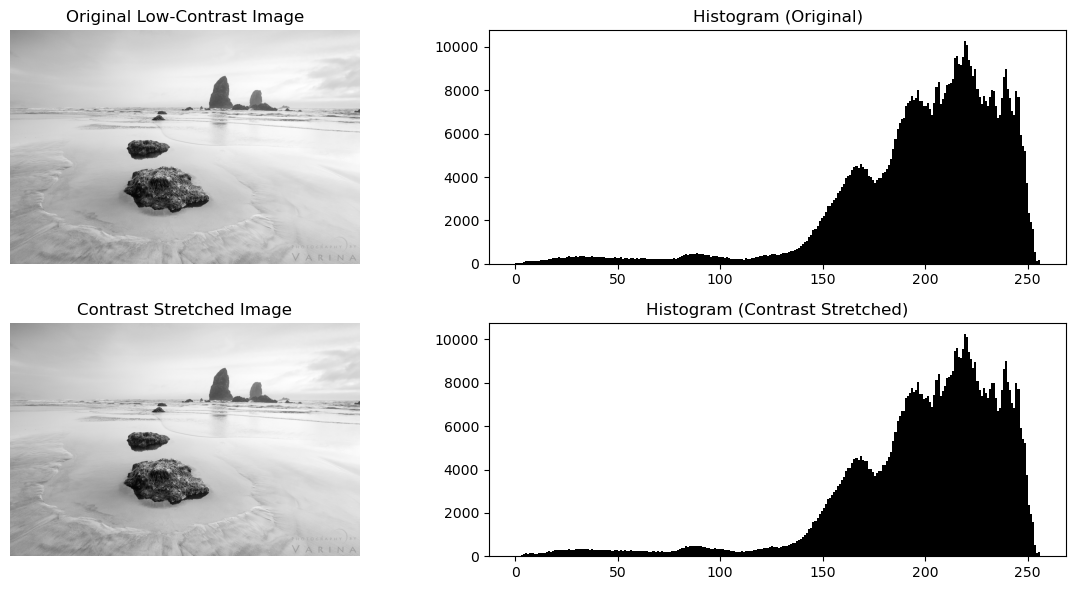

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load low-contrast image (grayscale)
img = cv2.imread("low_contrast_img.jpg", cv2.IMREAD_GRAYSCALE)

# Contrast Stretching
min_val = np.min(img)
max_val = np.max(img)
contrast_stretched = ((img - min_val) / (max_val - min_val)) * 255
contrast_stretched = contrast_stretched.astype(np.uint8)

# Plot Images and Histograms
plt.figure(figsize=(12,6))


plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Low-Contrast Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.hist(img.ravel(), bins=256, range=[0,256], color='black')
plt.title("Histogram (Original)")


plt.subplot(2,2,3)
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Contrast Stretched Image")
plt.axis("off")

plt.subplot(2,2,4)
plt.hist(contrast_stretched.ravel(), bins=256, range=[0,256], color='black')
plt.title("Histogram (Contrast Stretched)")

plt.tight_layout()
plt.show()


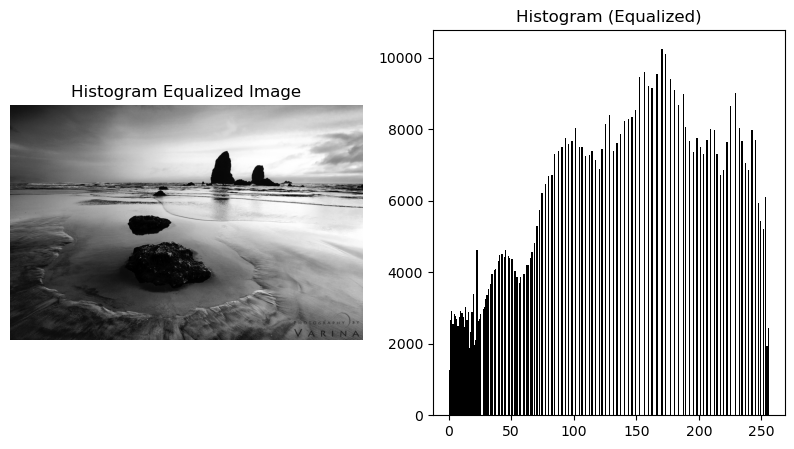

In [4]:
# Histogram Equalization
hist_eq = cv2.equalizeHist(img)

# Display histogram equalized image and histogram
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.hist(hist_eq.ravel(), bins=256, range=[0,256], color='black')
plt.title("Histogram (Equalized)")

plt.show()


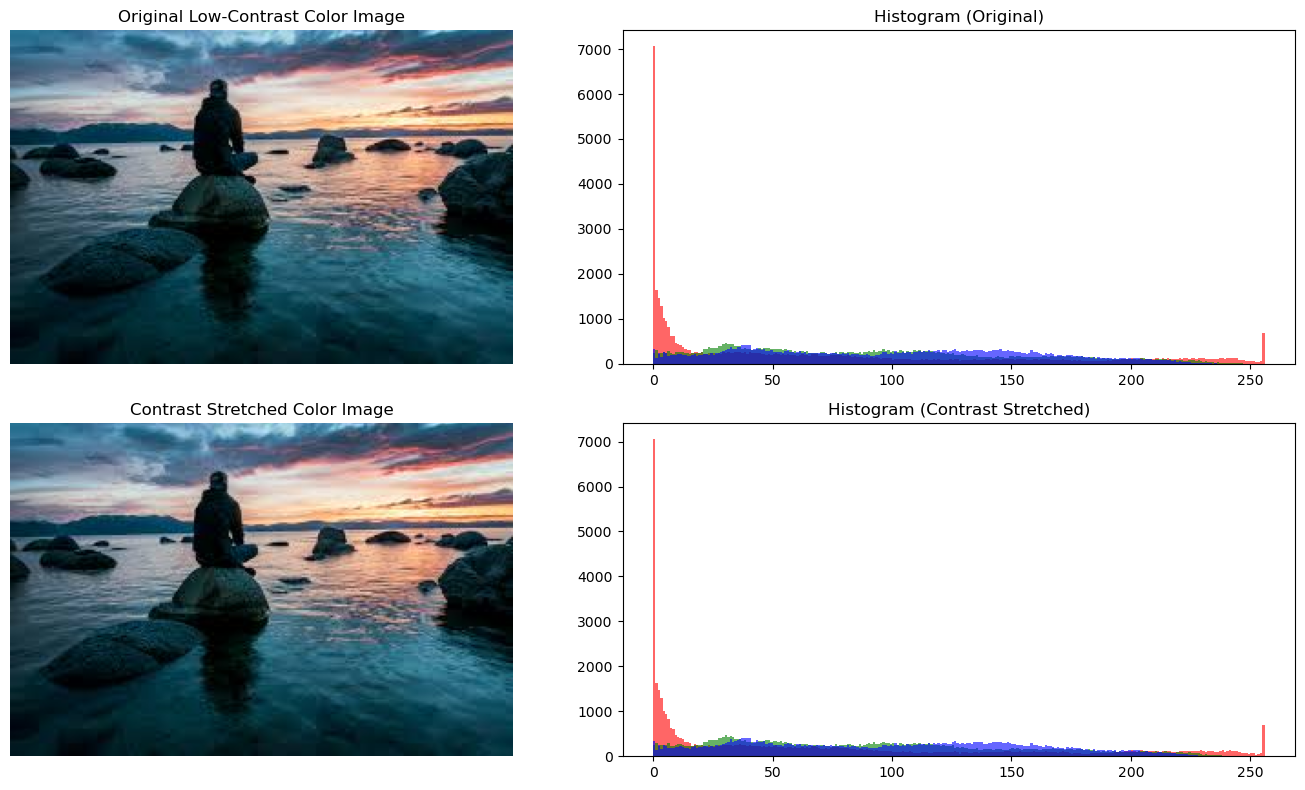

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load color image
img = cv2.imread("colourimg.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR -> RGB for plotting

# --------------------
# Contrast Stretching (per channel)
# --------------------
contrast_stretched = np.zeros_like(img)

for i in range(3):  # For R, G, B channels
    min_val = np.min(img[:,:,i])
    max_val = np.max(img[:,:,i])
    contrast_stretched[:,:,i] = ((img[:,:,i] - min_val) / (max_val - min_val)) * 255

contrast_stretched = contrast_stretched.astype(np.uint8)

# --------------------
# Plot Images
# --------------------
plt.figure(figsize=(14,8))

# Original Image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title("Original Low-Contrast Color Image")
plt.axis("off")

# Histogram of Original (RGB channels)
plt.subplot(2,2,2)
colors = ('r','g','b')
for i, col in enumerate(colors):
    plt.hist(img[:,:,i].ravel(), bins=256, range=[0,256], color=col, alpha=0.6)
plt.title("Histogram (Original)")

# Contrast Stretched Image
plt.subplot(2,2,3)
plt.imshow(contrast_stretched)
plt.title("Contrast Stretched Color Image")
plt.axis("off")

# Histogram of Contrast Stretched (RGB channels)
plt.subplot(2,2,4)
for i, col in enumerate(colors):
    plt.hist(contrast_stretched[:,:,i].ravel(), bins=256, range=[0,256], color=col, alpha=0.6)
plt.title("Histogram (Contrast Stretched)")

plt.tight_layout()
plt.show()
